In [2]:
!pip install ultralytics --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 10.8 MB/s eta 0:00:00



0: 608x800 1 live, 787.5ms
Speed: 6.4ms preprocess, 787.5ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


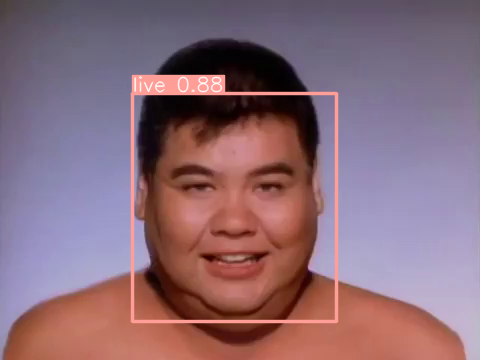

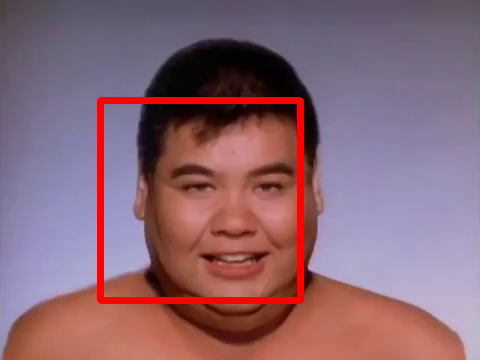


0: 608x800 1 live, 772.3ms
Speed: 6.3ms preprocess, 772.3ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 800)


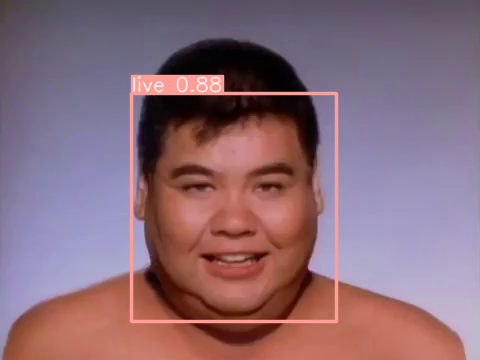

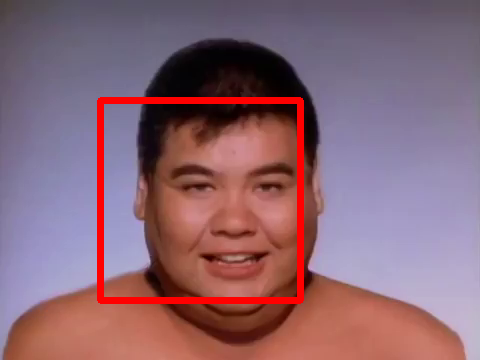


0: 608x800 1 live, 767.7ms
Speed: 6.5ms preprocess, 767.7ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 800)


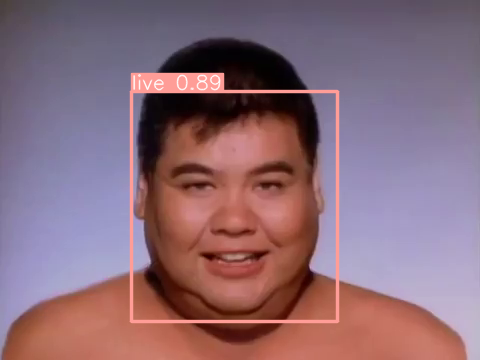

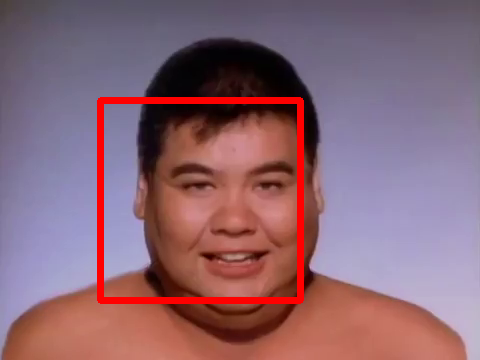


0: 608x800 1 live, 772.3ms
Speed: 9.2ms preprocess, 772.3ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)


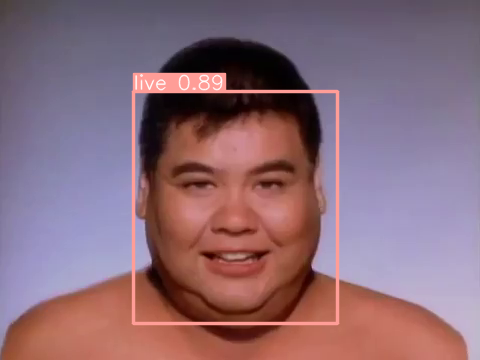

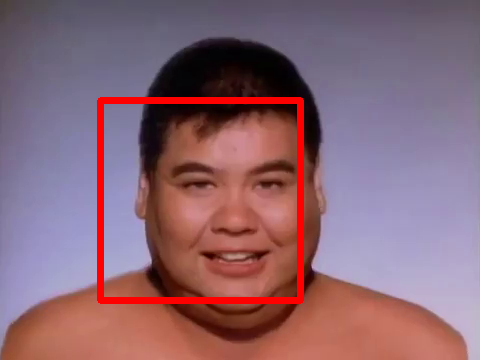


0: 608x800 1 live, 765.4ms
Speed: 5.6ms preprocess, 765.4ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)


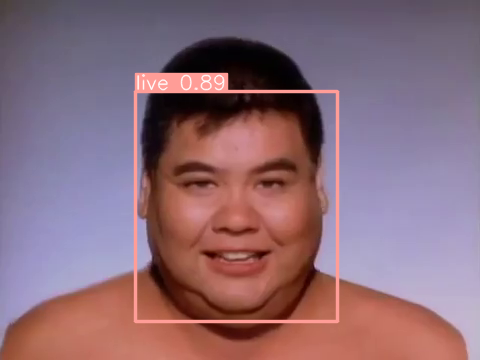

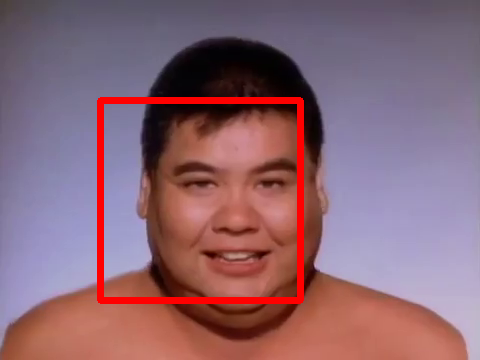


0: 608x800 1 live, 798.0ms
Speed: 6.2ms preprocess, 798.0ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)


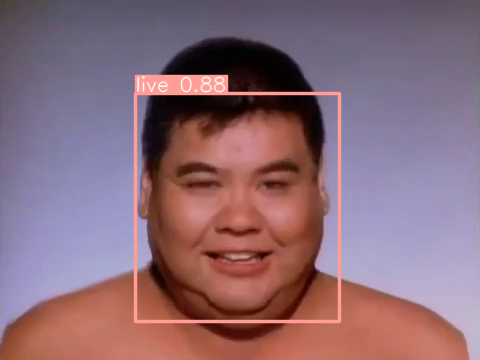

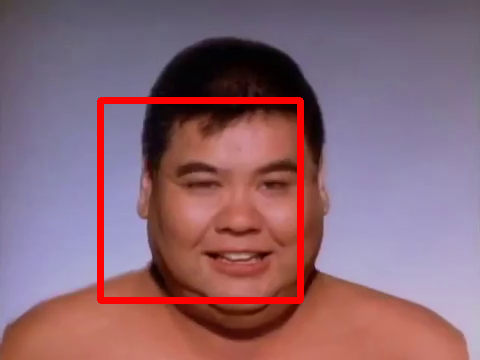


0: 608x800 1 live, 777.3ms
Speed: 5.2ms preprocess, 777.3ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)


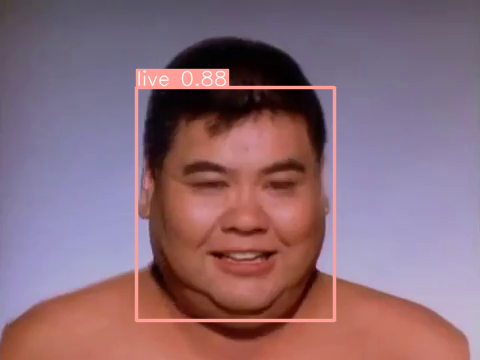

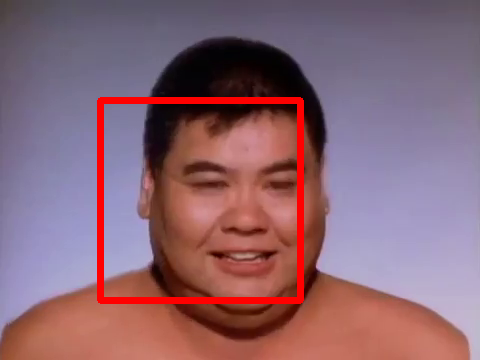


0: 608x800 1 live, 778.6ms
Speed: 6.8ms preprocess, 778.6ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)


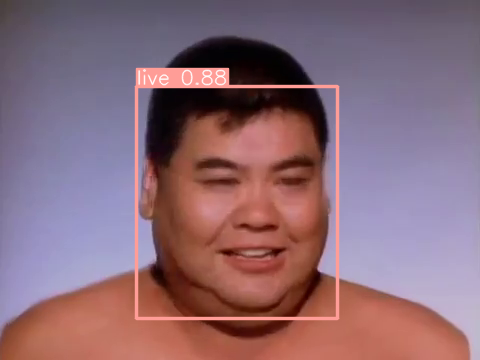

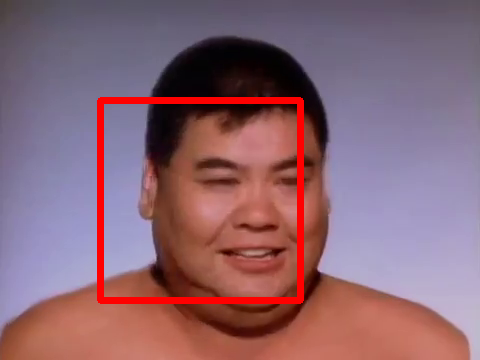


0: 608x800 1 live, 797.7ms
Speed: 5.4ms preprocess, 797.7ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)


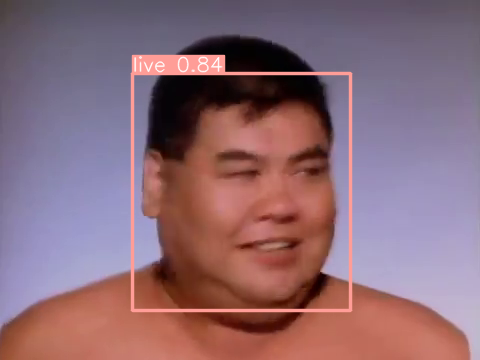

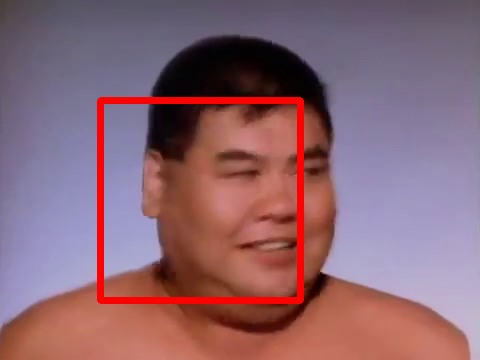


0: 608x800 1 live, 804.8ms
Speed: 5.4ms preprocess, 804.8ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)


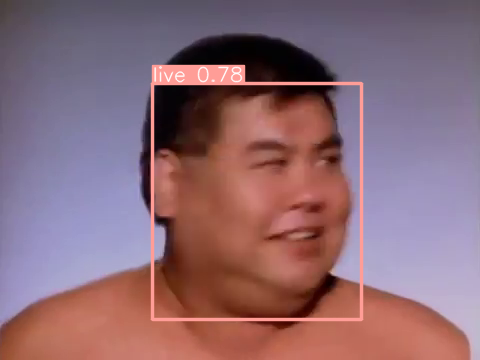

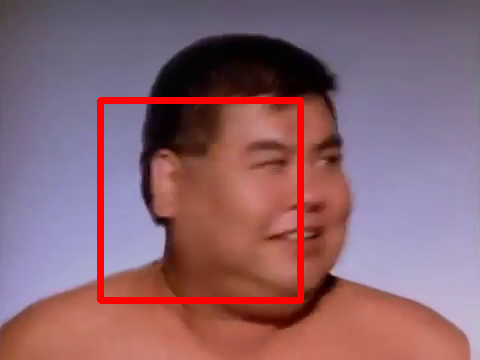


0: 608x800 2 lives, 1155.1ms
Speed: 5.5ms preprocess, 1155.1ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)


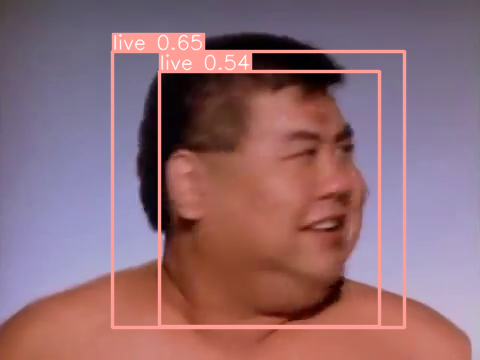

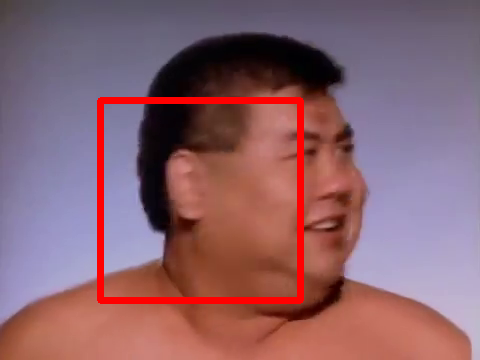


0: 608x800 2 lives, 1241.9ms
Speed: 5.3ms preprocess, 1241.9ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 800)


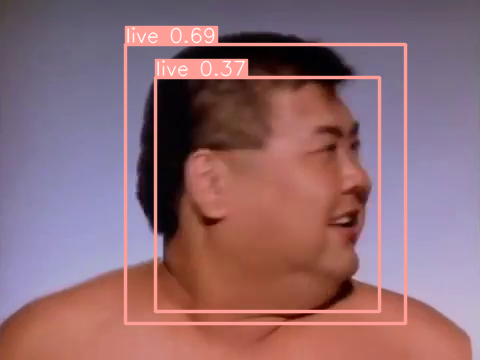

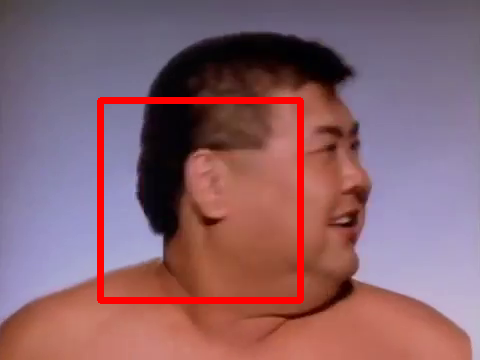


0: 608x800 1 live, 1212.1ms
Speed: 5.6ms preprocess, 1212.1ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)


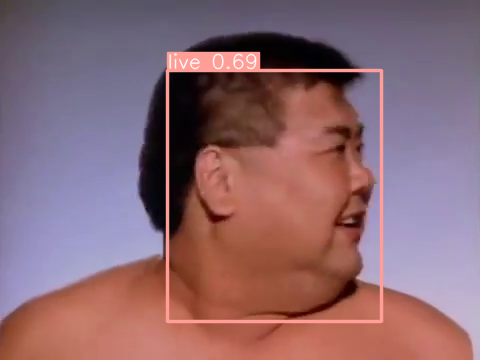

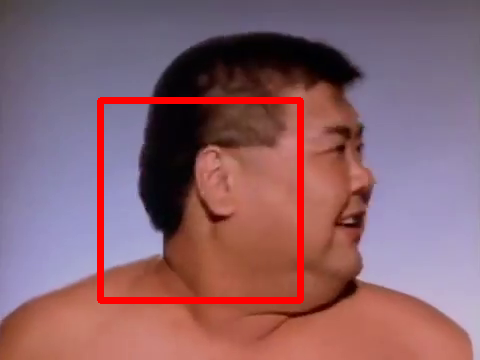


0: 608x800 1 live, 869.4ms
Speed: 12.7ms preprocess, 869.4ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)


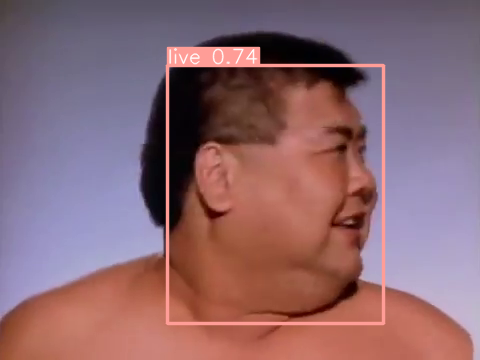

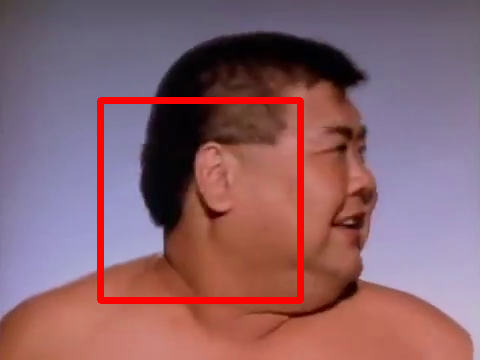


0: 608x800 1 live, 844.1ms
Speed: 5.3ms preprocess, 844.1ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)


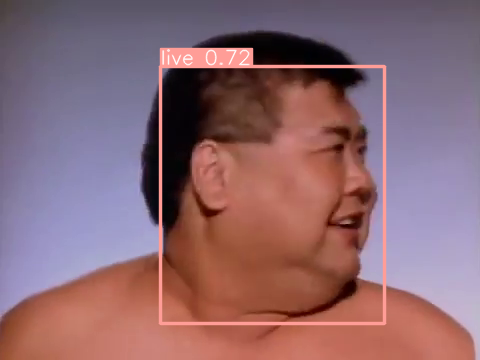

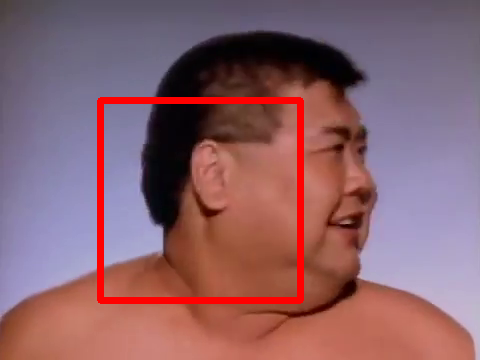


0: 608x800 1 live, 842.0ms
Speed: 5.4ms preprocess, 842.0ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)


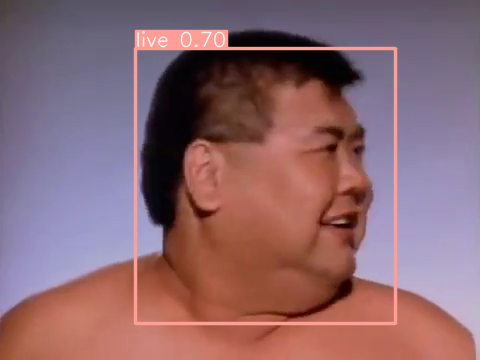

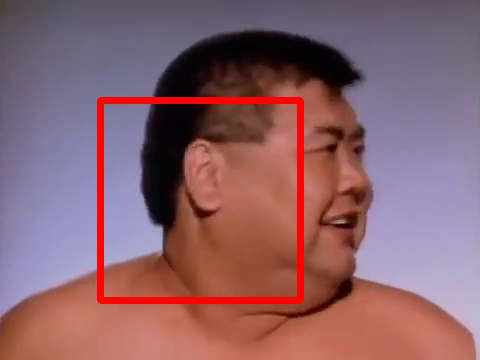

KeyboardInterrupt: ignored

In [5]:
import cv2
from ultralytics import YOLO # Importa o YOLO
model = YOLO("best.pt") # Carrega o modelo
from google.colab.patches import cv2_imshow

# Abre o arquivo de video
input_video = cv2.VideoCapture('videoprova.mp4')

# Checa se foi possivel abrir o arquivo
if not input_video.isOpened():
    print("Error opening video file")
    exit(1)

# Como foi possível abrir o video de entrada, vamos agora utilizar
# essa captura para definir o tamanho do video de saida
width  = int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH))   # float `width`
height = int(input_video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Cria a estrutura do video de saida
# Com formato e local do arquivo de saida
# Codec utilizado
# FPS do video e
# Tamanho do video
output_video = cv2.VideoWriter( './saida/out.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, (width, height))

# Loop de leitura frame por frame
while True:
    # Le um frame do video e, guarda o resultado da leitura
    # Se nao houver mais frames disponiveis, ret sera falso
    ret, frame = input_video.read()
    results = model(frame)


    annotated_frame = results[0].plot()

    cv2_imshow( annotated_frame)


    # Se nao conseguiu ler o frame, para o laco
    if not ret:
        break

    # Vamos editar o frame com um retangulo
    cv2.rectangle(
            img=frame,
            pt1=(100, 100),
            pt2=(300, 300),
            color=(0,0,255),
            thickness=5
        )

    # Exibe o frame
    cv2_imshow( frame)

    # Escreve o frame no output
    output_video.write(frame)

    # Se o usuario apertar q, encerra o playback
    # O valor utilizado no waiKey define o fps do playback
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Fecha tudo
output_video.release()
input_video.release()
cv2.destroyAllWindows()